## **Assignment 3 - Main Chain Modelling**
### **Hugo Manuel Alves Henriques e Silva, hugoalv@student.chalmers.se**

#### **How to run:**
`Run the cells below in order. Make sure to have the datasets in the same folder as the notebook.`

### **This is an auxiliary file that is used to compute the distributions of angles and distances between alpha carbons in 3 given datasets.**

In [21]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
files = ['2csn.pdb', '1cdh.pdb', '1crn.pdb']

file_atom_lines = []
for file_path in files:
    with open(file_path, 'r') as file:
        atom_lines = [line for line in file if line.startswith('ATOM')]
        file_atom_lines.append(atom_lines)

print(len(file_atom_lines))

file_alpha_carbons = []
for atom_lines in file_atom_lines:
    alpha_carbons = [line for line in atom_lines if line[13:15] == 'CA']
    file_alpha_carbons.append(alpha_carbons)

file_alpha_carbon_coords = []


for alpha_carbons in file_alpha_carbons:
    file_coords = []
    
    for line in alpha_carbons:
        x = float(line[30:38].strip())
        y = float(line[38:46].strip())
        z = float(line[46:54].strip())
        file_coords.append((x, y, z))

    file_alpha_carbon_coords.append(file_coords)

3


In [23]:
def calculate_angle_3_points(atom1, atom2, atom3):
    vector_2_1 = [atom1[0] - atom2[0], atom1[1] - atom2[1], atom1[2] - atom2[2]]
    vector_2_3 = [atom3[0] - atom2[0], atom3[1] - atom2[1], atom3[2] - atom2[2]]

    norm_vector_1_2 = math.sqrt(vector_2_1[0]**2 + vector_2_1[1]**2 + vector_2_1[2]**2)
    norm_vector_1_3 = math.sqrt(vector_2_3[0]**2 + vector_2_3[1]**2 + vector_2_3[2]**2)

    angle = math.degrees(math.acos((vector_2_1[0]*vector_2_3[0] + vector_2_1[1]*vector_2_3[1] + vector_2_1[2]*vector_2_3[2])/(norm_vector_1_2*norm_vector_1_3)))

    return angle

def calculate_distance_2_points(atom1, atom2):
    distance = math.sqrt((atom1[0] - atom2[0])**2 + (atom1[1] - atom2[1])**2 + (atom1[2] - atom2[2])**2)
    return distance

In [24]:
# Calculate angles for every three consecutive CA atoms
angles = []
for file_coords in file_alpha_carbon_coords:
    for i in range(len(file_coords) - 2):
        atom1, atom2, atom3 = file_coords[i], file_coords[i+1], file_coords[i+2]
        angle_data = calculate_angle_3_points(atom1, atom2, atom3)
        angles.append(angle_data)

distances = []
for file_coords in file_alpha_carbon_coords:
    for i in range(len(file_coords) - 1):
        atom1, atom2 = file_coords[i], file_coords[i+1]
        distance_data = calculate_distance_2_points(atom1, atom2)
        distances.append(distance_data)

/var/folders/0v/j168s2s91bxf0vr_r7rn3m_c0000gn/T/ipykernel_56220/2466244065.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(angles, shade=True, color="blue")


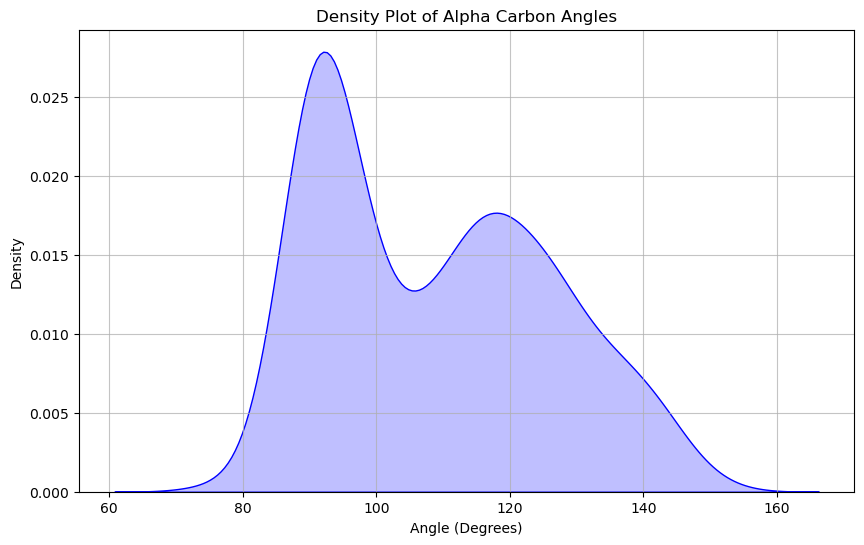

/var/folders/0v/j168s2s91bxf0vr_r7rn3m_c0000gn/T/ipykernel_56220/2466244065.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(distances, shade=True, color="blue")


<Axes: ylabel='Density'>

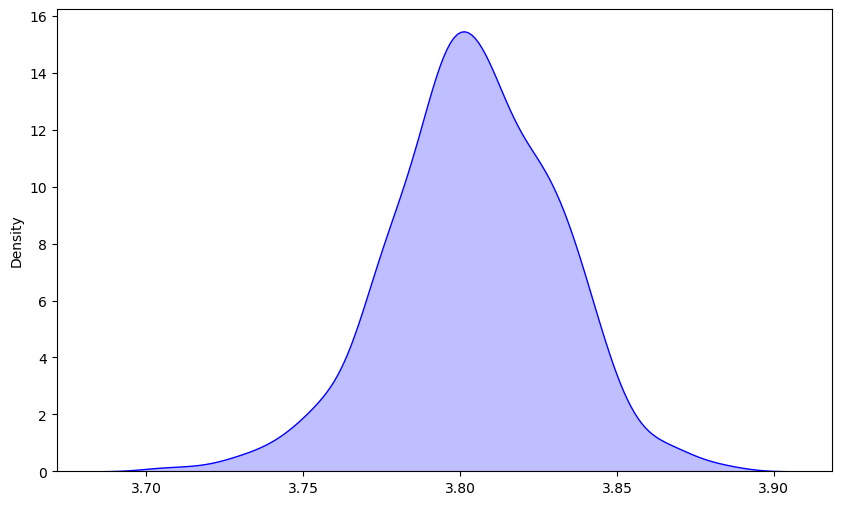

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(angles, shade=True, color="blue")

plt.title('Density Plot of Alpha Carbon Angles')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Density')
plt.grid(alpha=0.75)

plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(distances, shade=True, color="blue")
